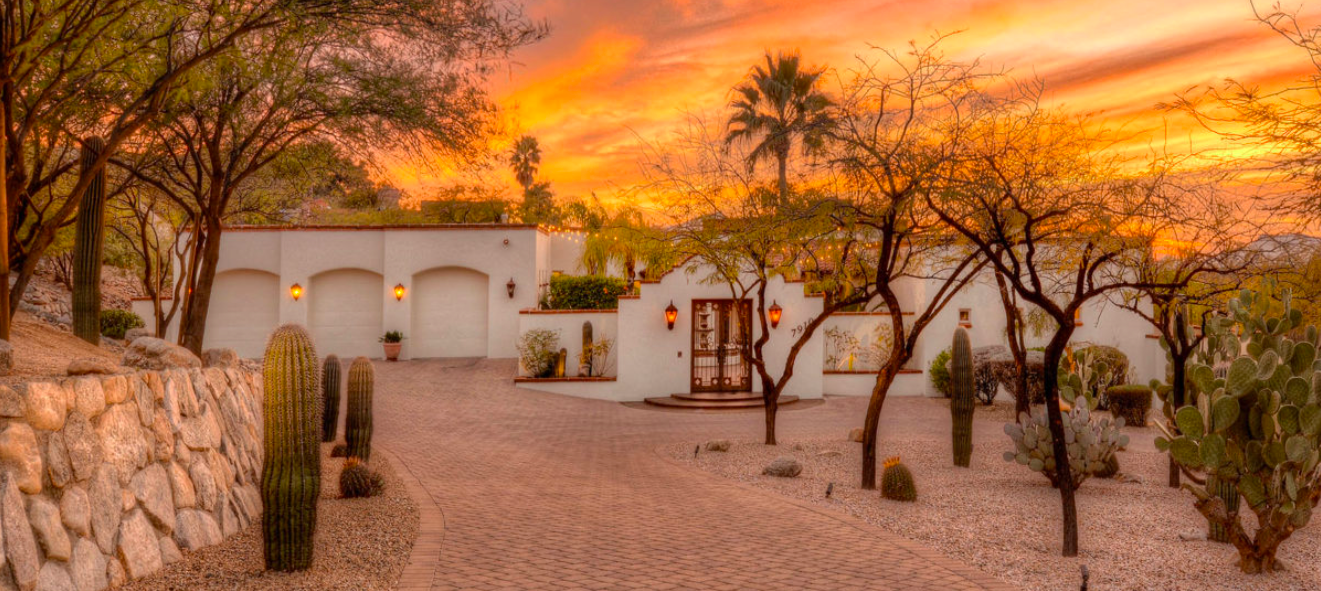

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import env
import wrangle
import scipy.stats
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(123)

# Zillow 2017 Report: Estimating Home Value

### Project Overview

The purpose of this project is to create a model (or multiple models) that outperform zillow's current model for predicting home values. The report includes all steps of the data science pipeline. 

### Business Goals

- Construct an ML Regression model that predicts propery tax assessed values of Single Family Properties using attributes of the properties.
- Find the key drivers of property value for single family properties.
- Deliver a report that the data science team can read through and replicate, understand what steps were taken, why and what the outcome was.
- Make recommendations on what works or doesn't work in predicting home values.
- Provide information about what state and county the data has been pulled from

### Deliverables
- Github repo with a complete readme.md
- Final Report 
- Acquire and Prepare Modules 
- Supplementary Exploration Notebooks
- Live 5 minute presentation

### Data Acquisition and Preparation

- Data was acquired from zillow table from Codeup SQL Database 

Data Preparation Steps 
- Sorted Values in Descending order and dropped (first) row with 2018 transaction 
- Dropped columns propertylandusedesc, transactiondate (only joined into original data to filter by 'single family homes', and 'transaction date 2017 homes')
- Dropped all null values 
- Dropped outliers using Q1/Q3 plus/minus (1.5 * IQR) for bedroom count, bathroom count, square feet, and tax value dollar count 
- Converted fips, yearbuilt, taxvaluedollarcnt, calculatedfinishedsquarefeet, and bedroomcnt to datatype integer 

In [2]:
df = wrangle.wrangle_zillow()

Acquiring data from SQL database


Split Data: train, validate, test

In [3]:
train, validate, test = wrangle.split_zillow_data(df)

In [4]:
train.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'fips'],
      dtype='object')

# Exploratory Data Analysis

### Goal
- Find the key drivers of property value for single family properties. 

### Exploratory Questions: 
- Why do some properties have a much higher value than others when they are located so close to each other? 
- Why are some properties valued so differently from others when they have nearly the same physical attributes but only differ in location? 
- Which has a greater influence on home value: number of bathrooms or number of bedrooms?

### Hypothesis 
- Given the same location, older properties have less tax value than newer properties 
- Given the same location, properties with more bedrooms have a higher tax value than homes with fewer bedrooms. 
- Given the same location, properties with more bathrooms have a higher tax value than homes with fewer bathrooms. 

In [11]:
train.head(2)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
49171,5,3.0,2758,474761,1971,6111
25865,3,2.0,1469,290756,1953,6037


### Statistical Testing

### Modeling

Questions from the team: 
- Would a new feature improve model accuracy? 
- Would a non-linear regression algorithm improve model accuracy?
- Would separating the data by county and applying different models improve accuracy?

### Model Evaluation

### Key Findings

### Recommendations

### Next Steps